In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder

data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Data preparation

In [83]:
# deleting goalkeepers and their data
data = data[~data['team_position'].str.contains('GK', na=False)]
data = data[[col for col in data.columns if 'goal' not in col and 'gk' not in col]]
numeric_df = data.select_dtypes(include=[np.number])

data = pd.concat([numeric_df, data['short_name']], axis=1)
nan_rows = data.iloc[:, 8:50].isna().any(axis=1)
data = data[~nan_rows]

data.head()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,short_name
1,20801,34,187,83,93,93,58500000,405000,5,4,...,63,29,95,82,85,95,28,32,24,Cristiano Ronaldo
2,190871,27,175,68,92,92,105500000,290000,5,5,...,51,36,87,90,90,94,27,26,29,Neymar Jr
4,183277,28,175,74,91,91,90000000,470000,4,4,...,54,41,87,89,88,91,34,27,22,E. Hazard
5,192985,28,181,70,91,91,90000000,370000,4,5,...,76,61,88,94,79,91,68,58,51,K. De Bruyne
7,203376,27,193,92,90,91,78000000,200000,3,3,...,82,89,47,65,62,89,91,92,85,V. van Dijk


## Linear regression visualization

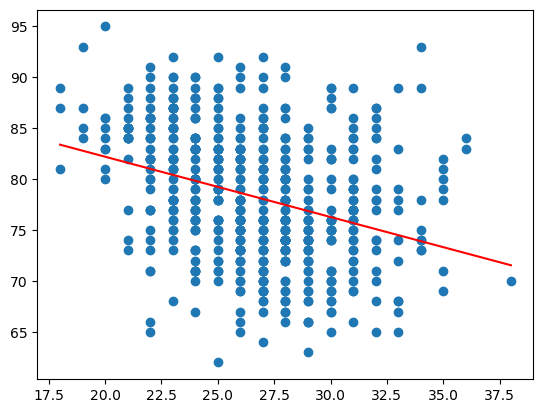

Mean Squared Error: 36.74637878310417


In [84]:
X_age = data['age'].values.reshape(-1, 1)
y_value = data['potential'].values.reshape(-1)

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_age, y_value, test_size=0.2, random_state=31)

X_range = np.linspace(X_age.min(), X_age.max(), 100)
model.fit(X_train, y_train)
y_line = model.coef_ * X_range + model.intercept_
plt.scatter(X_train, y_train)
plt.plot(X_range, y_line, c='r')
plt.show()

error = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error:', error)
# Potential of players decreases with age


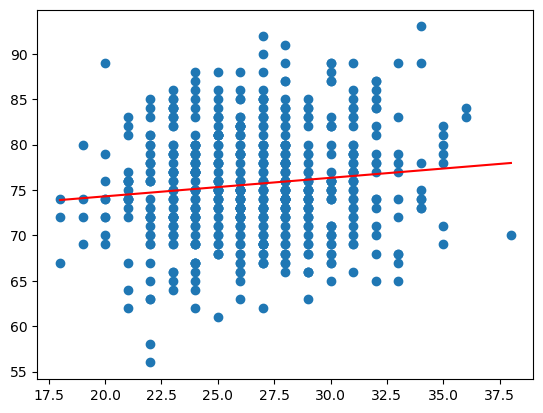

Mean Squared Error for 1st degree: 38.59415418864197


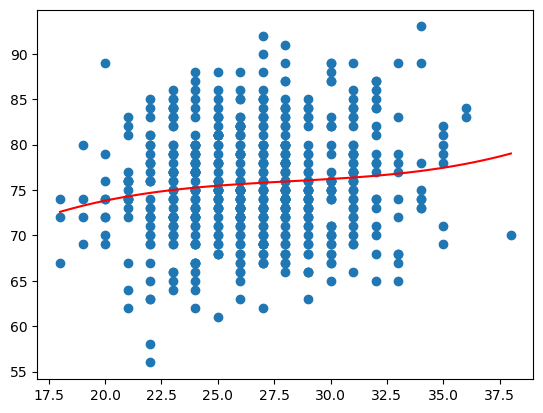

Mean Squared Error for 2nd degree: 38.330479611250055


In [85]:

y_value = data['overall'].values.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_age, y_value, test_size=0.2, random_state=31)

X_range = np.linspace(X_age.min(), X_age.max(), 100)
model.fit(X_train, y_train)
y_line = model.coef_ * X_range + model.intercept_
plt.scatter(X_train, y_train)
plt.plot(X_range, y_line, c='r')
plt.show()
error = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error for 1st degree:', error)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model.fit(X_train_poly, y_train)

X_range_poly = poly.transform(X_range.reshape(-1, 1))
y_line_poly = model.predict(X_range_poly)

plt.scatter(X_train, y_train)
plt.plot(X_range, y_line_poly, c='r')
plt.show()
error = mean_squared_error(y_test, model.predict(X_test_poly))
print('Mean Squared Error for 2nd degree:', error)

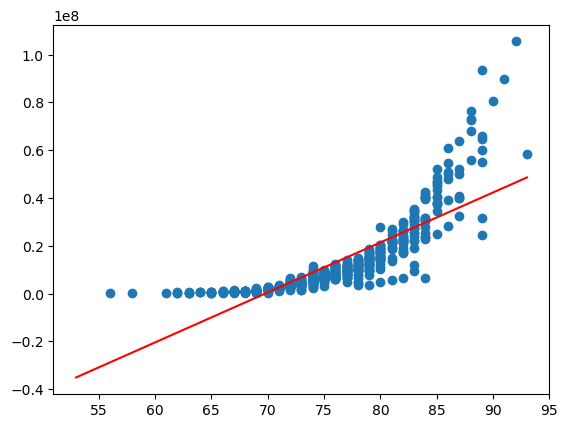

Mean Squared Error for 1st degree: 86424976984824.42


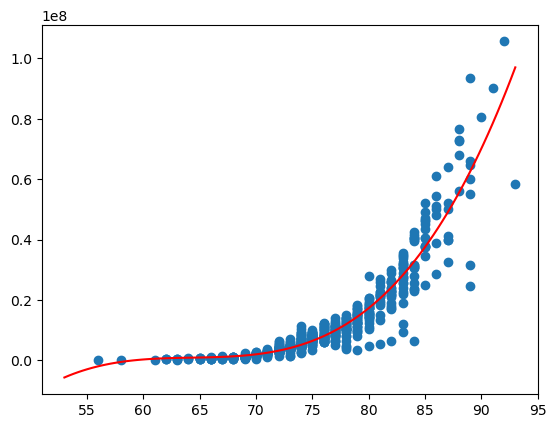

Mean Squared Error for 3nd degree: 16012508241931.15


In [86]:
X = data['overall'].values.reshape(-1, 1)
y = data['value_eur'].values.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
X_range = np.linspace(X.min(), X.max(), 100)
model.fit(X_train, y_train)
y_line = model.coef_ * X_range + model.intercept_
plt.scatter(X_train, y_train)
plt.plot(X_range, y_line, c='r')
plt.show()
error = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error for 1st degree:', error)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model.fit(X_train_poly, y_train)

X_range_poly = poly.transform(X_range.reshape(-1, 1))
y_line_poly = model.predict(X_range_poly)

plt.scatter(X_train, y_train)
plt.plot(X_range, y_line_poly, c='r')
plt.show()
error = mean_squared_error(y_test, model.predict(X_test_poly))
print('Mean Squared Error for 3nd degree:', error)

In [94]:
X = data.iloc[:, 6:50].drop(data.columns[[12,13,14]],axis=1).values.reshape(-1, 41)
y_value = data['overall'].values.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y_value, test_size=0.2, random_state=31)
model.fit(X_train, y_train)
error = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error for 1st degree:', error)

y_value = data['potential'].values.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X, y_value, test_size=0.2, random_state=31)
model.fit(X_train, y_train)
error = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error for 1st degree:', error)

y_value = data['value_eur'].values.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X, y_value, test_size=0.2, random_state=31)
model.fit(X_train, y_train)
error = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error for 1st degree:', error)

# Too many features, not possible to go for higher degrees due to lack of computational power
# Prediction of overall score is quite accurate, but potential and value are not
# Probably because overall score is calculated based on the features, and potential is not
# Value depends on the market and human factors, not only the features

Mean Squared Error for 1st degree: 2.9031548856692444
Mean Squared Error for 1st degree: 9.789117226796805
Mean Squared Error for 1st degree: 6.640039221947915e-17
